## Анализ продаж интернет-магазина с помощью А/В теста

### Описание данных
Данные для первой части  
1. Файл /datasets/hypothesis.csv. 
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Данные для второй части
1. Файл /datasets/orders.csv. 
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.
1. Файл /datasets/visitors.csv.
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Описание проекта
Отдел маркетинга подготовил список гипотез для увеличения выручки.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.


Часть 1. Приоритизация гипотез.
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `*Reach*`, `*Impact*`, `*Confidence*`, `*Effort*`.

- Задача
    Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

- Часть 2. Анализ A/B-теста  
Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

- Задача
Проанализируйте A/B-тест:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Цели исследования**:

Используя данные интернет-магазина приоритизировать гипотезы, произвести оценку результатов A/B-тестирования различными методами

**Основные этапы работы**:
1. загрузка и проработка данных, подготовка данных к анализу
2. Изучение и проверка данных
3. Изучить результаты эксперимента
4. Сделать выводы о корректности данных и проведение А\В теста

## Загрузка данных, изучение и подготовка их к тестам

Импортирование библиотек и настройка вывода данных 

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import scipy.stats as stats
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1
pd.options.display.max_columns = None

Чтение файлов

In [3]:
hypothesis_path ='/datasets/hypothesis.csv'
orders_path = '/datasets/orders.csv'
visits_path = '/datasets/visitors.csv'


hypothesis = pd.read_csv('.' + hypothesis_path)

orders = pd.read_csv('.' + orders_path)
    
visits = pd.read_csv('.' + visits_path)

Просмотр общей информации в наборах, проверим на достоверность данных

In [4]:
# Изучим предоставленные гипотезы
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Набор данных с гипотезами имеет 9 вариантов, оценки заполнены пропущенных значений нет

In [6]:
# привел формат названия к общему виду
hypothesis.columns = hypothesis.columns.str.lower()

In [8]:
# Сделаем рандомную выборку данных о заказав группе
display(orders.sample(10))

,transactionId,visitorId,date,revenue,group
59,2787983461,2115666868,2019-08-16,7860,B
975,3492564891,228221722,2019-08-22,12336,B
708,3256245027,993094131,2019-08-07,1399,B
754,860384268,2316833558,2019-08-30,2580,B
404,2052514069,1995481842,2019-08-28,70,B
163,1071437802,2892265953,2019-08-17,650,A
538,1703637902,4251087345,2019-08-04,4880,B
987,287313500,172218683,2019-08-10,1440,B
626,3022667018,3935952912,2019-08-29,1634,B
1088,749851973,2882903413,2019-08-12,6585,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Набор данных заказов имеет 1197 строки, все ячейки заполнены и пропусков нету.

In [10]:
# Приведем колонку 'date' к типу времени
orders['date'] = orders['date'].map(lambda x: dt.strptime(x, '%Y-%m-%d'))

# Посмотрим временной промежуток сбора данных
orders['date'].describe()

count     1197               
unique    31                 
top       2019-08-05 00:00:00
freq      48                 
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

В выборке находятьс данные собранные за август 2019 года, итого 31 день

In [11]:
# Проверка колонки выручки на аномальные значения
print(orders['revenue'].describe().apply(lambda x: format(x, 'f')))

# Итоговая выручка за месяц
print(f'Итоговая выручка за август: {round(orders.revenue.sum())}Р')

count    1197.000000   
mean     8348.005848   
std      39191.131774  
min      50.000000     
25%      1220.000000   
50%      2978.000000   
75%      8290.000000   
max      1294500.000000
Name: revenue, dtype: object
Итоговая выручка за август: 9992563Р


Итоговая выручка за месяц близка к 10млн. Отрицательных значений нет. Есть покупка на 1.2 млн, что вызывает большую погрешность для выручки

In [12]:
# Проверка колонки группы
orders.describe(include='object')

,group
count,1197
unique,2
top,B
freq,640


В наборе только 2 тестируемые группы, группа В совершила покупок больше группы А

In [13]:
# Проверка данных в наборе количества ежедневных посещений
visits.sample(10)

,date,group,visitors
38,2019-08-08,B,654
46,2019-08-16,B,413
34,2019-08-04,B,770
58,2019-08-28,B,654
10,2019-08-11,A,718
30,2019-08-31,A,699
9,2019-08-10,A,406
15,2019-08-16,A,361
3,2019-08-04,A,717
2,2019-08-03,A,507


In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Выборка имеет 62 строки, что соответствуют количеству дней в месяце помножено на количество групп. Пропущенных значений нет

In [15]:
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

In [16]:
visits['date'].describe()

count     62                 
unique    31                 
top       2019-08-01 00:00:00
freq      2                  
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

В наборе данных только дни за август 2019 года

In [17]:
#  Проверим значения количество посещений на аномалии и отрицательные значений
visits.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


В среднем на площадку посещали по 607 человек в группе в день, минимально количество - 307, максимально было - 770 посещений. Отрицательных значений нету

In [18]:
orders.duplicated().sum()

0

In [19]:
visits.duplicated().sum()

0

В представленных выборках дубликатов значений не найдено.

### Вывод
В предоставленных наборах данных было произведено ознакомление, не найдены пропущенные значения. Данные представляют хорошего качества сбора информации. Проверили на аномалии и отрицательные значения, которых не выявили. 

## Приоритизация гипотез.

In [20]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Произведем приоритизацию гипотез по методу `ICE Scoring` чтобы определить гипотезу с наивысшим приоритетом.

In [21]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],2)

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Лидирует предположение №8 **"Запустить акцию, дающую скидку на товар в день рождения"** ,
далее по важности приоритета есть предположение №0 **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** и замыкает тройку лидеров вариант №7 **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**

Все предположения интересны, но необходимо решить вопрос - сколько охватит пользователей каждое из предположений. Посчитаем приоритеты гипотез по методу `RICE Scoring` 

In [22]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективной становится благодаря охвату пользователей предположение и с большим количеством приоритизации №7 **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"**
* Далее следует предположение №2 **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"**
* Замыкает лидерство 2 предположения №0 **"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** и №6 **"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"**

У гипотез после занявших 2 и 3 место, отставиние от лидера более чем в 2 раза по приоритетности.

In [23]:
# сделаем выборку показателей лидеров двух метод
hypothesis.loc[[7, 8, 0, 2, 6]].sort_values('RICE',ascending=False).style.background_gradient('coolwarm')


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000


### Выводы
По методу `ICE` в приоритете гипотезы _№№ 8, 0, 7_. По методу `RICE` _№№ 7, 2, 0, 6_. Как видно из представленной выборки лидеров, гипотеза по методу `RICE` выходит на уверенное лидерство по праву того что,  аудитория магазина будет охвачена (`reach`) на 100%, влияние на аудиторию (`impact`) высокая, очень высокая уверенность в этом кейсе и сложность выполнения работ средняя. Так лидер метода `ICE` опускается на последнее место в выборке, в следствии того же показателя `reach` аудитории будет привлечено минимальное количество, и существенных финансов компании не принесет. Приоритет лучше отдать гипотезе №7. 

## Анализ A/B-теста

**Задача**

    Проанализировать полученные данные  A/B-теста по чек-листу:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
1. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
1. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
1. Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.
1. Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.
1. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
1. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
1. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
1. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
1. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.
1. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
1. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.
1. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
1. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [24]:
# Находим количество уникальных покупателей, которые хот раз покупали
cnt_buyers = orders['visitorId'].nunique()

# Находим покупателей которые находятся в обеих тестируемых группаах
cnt_bad_buyers = (orders.groupby('visitorId')
    .agg({'group': pd.Series.nunique})
    .query('group == 2').count()
                )                
# Подсчет конверсии по покупателям которые нарушают проведение теста
conv_bad_buyers = cnt_bad_buyers[0]/cnt_buyers
print(f'Количество пользователей находяшихся в 2 тестируемых группах: {cnt_bad_buyers[0]}', )
print(f'Конверсия: {conv_bad_buyers:.1%}')

Количество пользователей находяшихся в 2 тестируемых группах: 58
Конверсия: 5.6%


Итог подсчетов то, что группах обеих находятся 58 покупателей которые совершили покупки, и в итоге они проносят погрешности для теста. Необходимо уточнить о корректности таких неблагоприятных показателей для теста.

### Кумулятивная выручка по группам

In [25]:
# создаем набор уникольных пар значений дат месяца и группы
dates_groups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные данные о заказах по дням в гркппах
orders_aggregated = dates_groups.apply(
    # получим строки "orders" дата которых меньше или равна дате элемента из 'dates_groups`, а группа теста равна группе 'dates_groups'
    lambda x: orders[np.logical_and(orders['date'] <=x['date'], orders['group']==x['group'])]
    .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1
).sort_values(by=['date', 'group'])


# получаем агрегированные данные о посещениях по дням
visits_aggregated = dates_groups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1
).sort_values(by=['date', 'group'])

# соединяем выборки с групировкой по дате и группе
cumulative_data = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date','group'])

# переименуем колонки количества заказов и количество покупателей
cumulative_data = cumulative_data.rename(columns={'transactionId':'orders', 'visitorId':'buyers'})

cumulative_data.head()


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Посчитали ежедневную выручку по группам, в которой отражены накапливающиеся значения количества уникальных покупателей и количество заказов за прошедший день в каждой группе. Затем произвели подсчет ежедневного посещения магазина. И в конце мы соединяем все в одну выборку. 
Теперь проверим на графикам значения выручки в группах.

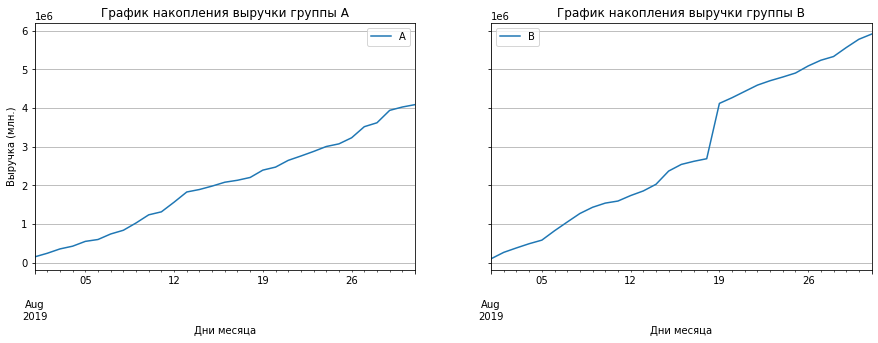

In [26]:
# отбираем данные по группам
cum_revenue_A = cumulative_data.query('group == "A"')[['date', 'revenue', 'orders']]
cum_revenue_B = cumulative_data.query('group == "B"')[['date', 'revenue', 'orders']]

# задаем размер сетки
plt.figure(figsize=(15, 10))

# задаем расположение первого графика на подложке
ax1=plt.subplot(2,2,1)
cum_revenue_A.plot(x='date', y='revenue', label='A', grid=True, ax=ax1)
plt.title('График накопления выручки группы А')
plt.xlabel('Дни месяца')
plt.ylabel('Выручка (млн.)')

# задаем расположение второго графика на подложке
ax2=plt.subplot(2,2,2, sharey=ax1)
cum_revenue_B.plot(x='date', y='revenue',grid=True, label='B', ax=ax2)
plt.title('График накопления выручки группы В')
plt.xlabel('Дни месяца')
plt.ylabel('Выручка (млн.)')
plt.show()



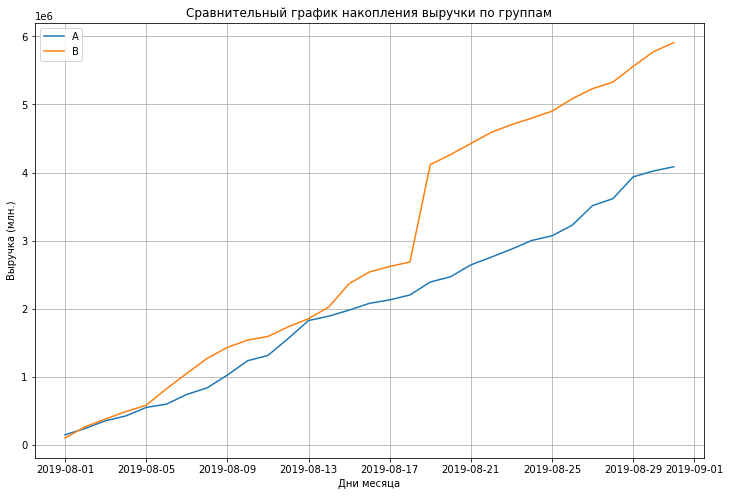

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue'], label='A')
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue'], label='B')
plt.title('Сравнительный график накопления выручки по группам')
plt.xlabel('Дни месяца')
plt.ylabel('Выручка (млн.)')
plt.grid()

plt.legend()
plt.show()

**Вывод**

В течении месяца наблюдается относительно стабильная картина. В каждой группе происходило равномерное накопление выручки в течении месяца, только в группе `В` наблюдается резкий скачок в выручке, что позволило группе `B` лидировать до конца месяца. Возможно это вызвало покупка с аномальной суммой, которую мы видели при ознакомлении с данными и такие аномальные покупки влияют на итоговые результаты.

### Кумулятивный расчет среднего чека по группам.

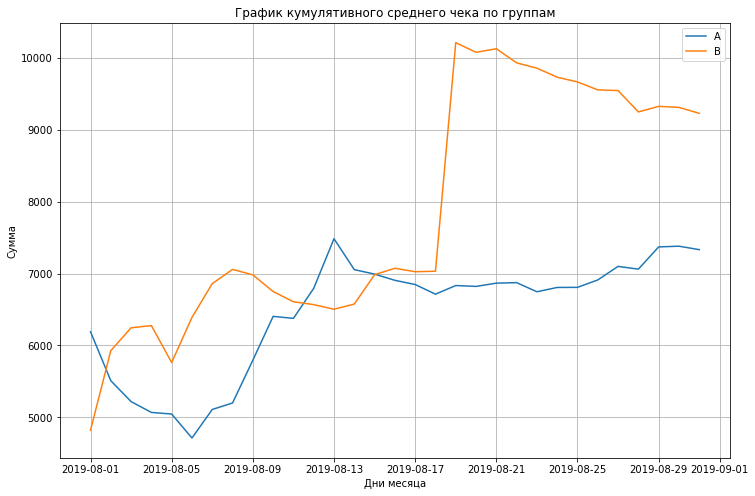

In [28]:
# задаем размер
plt.figure(figsize=(12, 8))

avg_check_A = cum_revenue_A['revenue']/cum_revenue_A['orders'] # средний чек группы А
avg_check_B = cum_revenue_B['revenue']/cum_revenue_B['orders'] # средний чек группы В

# График сводный 2-ух групп
plt.plot(cum_revenue_A['date'], avg_check_A, label='A')
plt.plot(cum_revenue_B['date'], avg_check_B, label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дни месяца')
plt.ylabel('Сумма')
plt.grid()
plt.legend()
plt.show()

**Вывод**

Средний чек группы `A` в начале месяца немного снизился, но к середине месяца вышел на плато на котором держался до конца месяца. Средний чек группы `B` рос постоянно до середины месяца, в этот момент происходит покупка на аномальную сумму. Предположение что аномальные покупки мешают качественно провести расчеты. В дальнейшем необходимо такие покупки убрать из расчетов.

### Относительные изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека между группами 

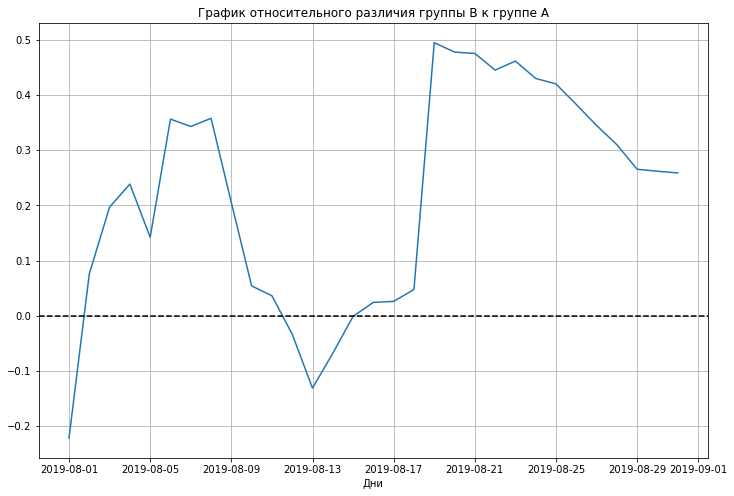

In [29]:
# Объединение таблиц
merged_cum_revenue = cum_revenue_A.merge(cum_revenue_B, left_on=['date'], right_on=['date'], suffixes=['_A', '_B'])
avg_check_group_A = merged_cum_revenue['revenue_A']/merged_cum_revenue['orders_A']
avg_check_group_B = merged_cum_revenue['revenue_B']/merged_cum_revenue['orders_B']

# задаем ррзмер
plt.figure(figsize=(12, 8))

plt.plot(cum_revenue_A['date'], avg_check_group_B/avg_check_group_A - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного различия группы В к группе А')
plt.xlabel('Дни')
plt.grid()
plt.show()

**Вывод** 

Наблюдаются резкие изменения в средних чеках по дням относительно групп, скорее всего были сделаны аномальные заказы в эти дни.

###  Кумулятивное  среднее количества заказов по группам

Сделаем подсчет конверсии количества заказов по количеству посещений за день.

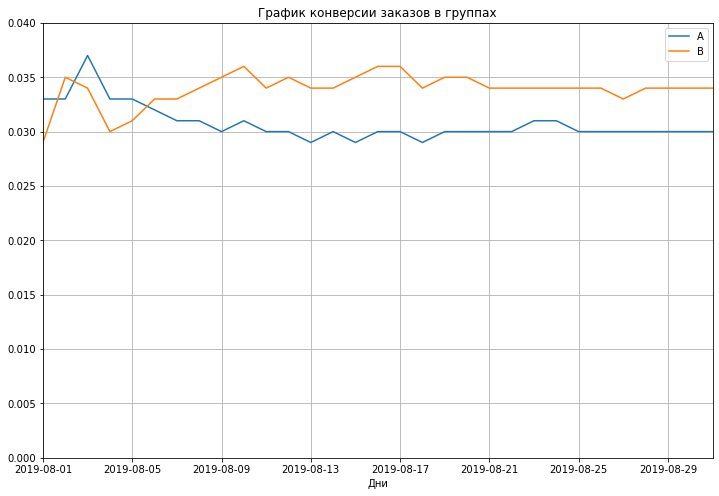

In [30]:
# Считаем конверсию
cumulative_data['conversion'] = round(cumulative_data['orders'] / cumulative_data['visitors'], 3)

# Разделение по группам
cumulative_data_A = cumulative_data.query('group == "A"')
cumulative_data_B = cumulative_data.query('group == "B"')

plt.figure(figsize=(12, 8))

# Строим график конверсии по группам
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.title('График конверсии заказов в группах')
plt.xlabel('Дни')

plt.grid()
plt.legend()

# задаем масштаб осей, уменьшим его что бы увидеть абсолютные значения колебаний
plt.axis([dt(2019, 8, 1), dt(2019, 8, 31), 0, 0.04])
plt.show()

**Вывод**

В начале теста группа `А` лидировала по конвертированию пользователей, но в течении недели его потеряла и до конца теста держалась на одном уровне.Конверсия для группы `А` составила - 3%, для группы `B` - 3.4%. Разница не большая.

### Относительные изменения кумулятивного среднего количества заказов группы B к группе A

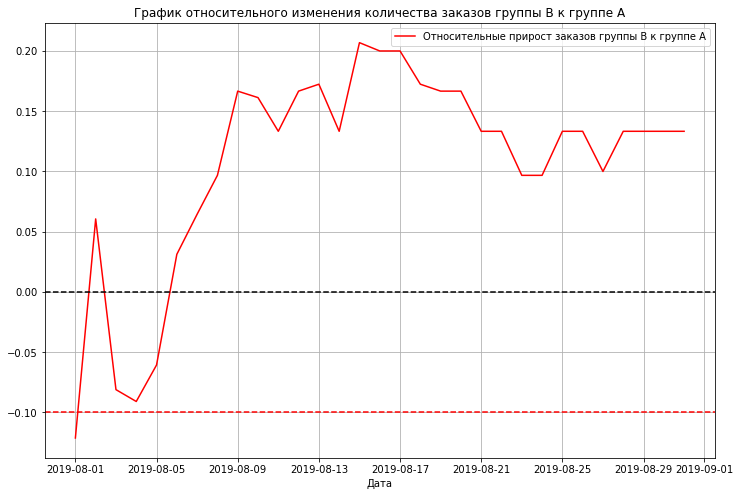

In [31]:
# Выборка конверсий каждой группы по дням
merged_cum_conversion_group = (
    cumulative_data_A[['date', 'conversion']]
    .merge(cumulative_data_B[['date', 'conversion']], left_on='date', right_on='date', suffixes=['_A','_B'])
)

# расчет относителных значений к группе А
reletion_conversion_group = merged_cum_conversion_group['conversion_B']/merged_cum_conversion_group['conversion_A'] - 1

# строим сетку
plt.figure(figsize=(12, 8))

# Вывод графика изменений конверсий по отнощению к группам
plt.plot(merged_cum_conversion_group['date'], reletion_conversion_group, 
         color='red', label='Относительные прирост заказов группы В к группе А')
plt.title('График относительного изменения количества заказов группы В к группе А')
plt.xlabel('Дата')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='red', linestyle='--')
plt.legend()
plt.grid()

plt.show()


**Вывод**

Вначале теста группа `B` отсавала от группы`A` по конвертации, но быстра навестала отставание и вышла в лидеры. В конце теста наблюдается небольшой спад, но всеравно группа по этому показателю показывает лучше группы `A`. Скорее всего группа `B` выходит по конвертации на плато с одним уровнем.

### Анализ выбросов по количеству заказов

Необходимо более детально изучить данные о заказах. Просмотрим заказы с аномальными значениями, что бы проверить предположение что они нам искажают результаты A/B теста.

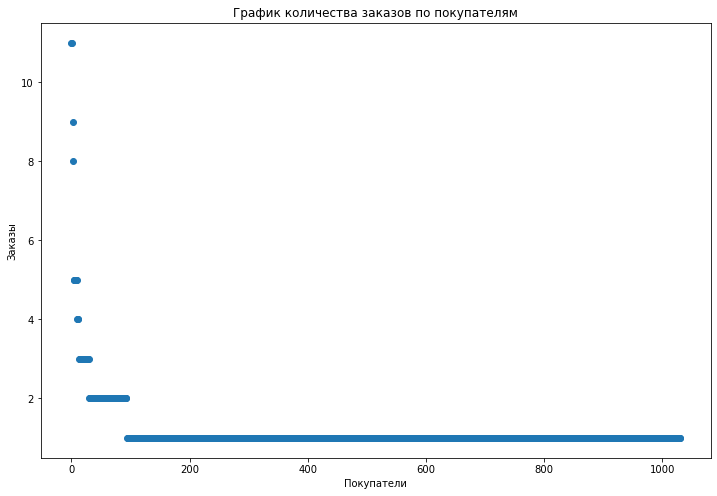

In [32]:
# сгруппировать заказы по id посетителя и подсчитать количество уникальных заказов
orders_by_users = (
    orders.groupby(by='visitorId', as_index=False)
    .agg({'transactionId':'nunique'})
    .sort_values('transactionId', ascending=False)
                  )
orders_by_users.columns = ['uid', 'cnt_orders']

plt.figure(figsize=(12, 8))

x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['cnt_orders'])

plt.title('График количества заказов по покупателям')
plt.ylabel('Заказы')
plt.xlabel('Покупатели')
plt.show()

Предположительно 4 заказа находятся за границей нормальных значений, большая часть покупателей не совершила больше 5 заказов. Проверим это с помощью выборочны процентилей (90%, 95%, 99%) значений по количеству заказов.

In [33]:
print(np.percentile(orders_by_users['cnt_orders'], [90, 95, 99]))

[1. 2. 4.]


90% покупателей совершили только 1 заказ за месяц, 5% покупателей совершили 2 заказа и только 1% от всех покупателей совершил заказов больше 4-ёх. Разумно будет выбрать за верхнюю границу числа заказов - 4 и около 1% аномальных значений пользователей мы отсеем, но данные станут чище от погрешностей.

### Анализ стоимости заказов

Аналогичным способом проверим заказы на аномальные значения

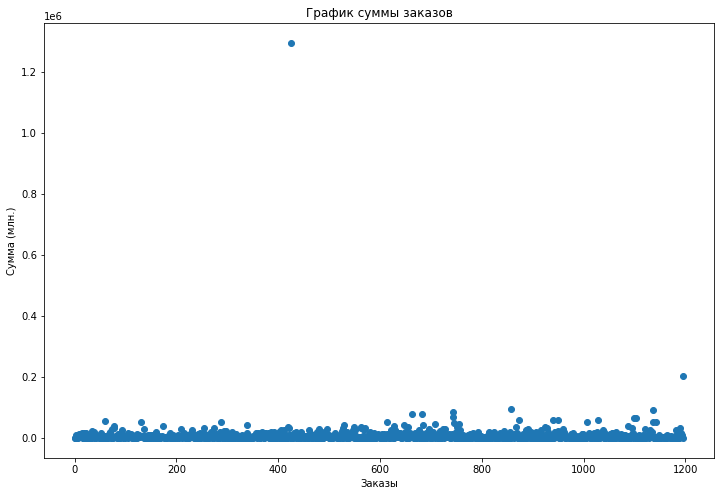

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
         
plt.figure(figsize=(12, 8))

plt.scatter(x_values, orders['revenue']) 

plt.title('График суммы заказов')
plt.xlabel('Заказы')
plt.ylabel('Сумма (млн.)')
plt.show()

Как и было видно на графиках, есть 2 аномальных заказа на сумму более 1млн и 200тыс. Дополнительно проверим данные на аномальные суммы по выборочным процентилеи (90%, 95%, 99%)

In [35]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Как нам показывают данные 90% заказов уложились в сумму до 18.2тыс, еще 5% в сумму до 28тыс, и только 1% заказов был больше 58тыс. Выберем границу в 28тыс. отсеим 5% данных.

###  Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Подготовим одну общую выборку, чтобы было легче ориентироваться в данных для анализа

In [36]:
# посещения магазина в группе А
dayly_visits_A = visits.query('group == "A"')[['date', 'visitors']].rename(columns={'visitors':'visitors_per_date_A'})
dayly_visits_B = visits.query('group == "B"')[['date', 'visitors']].rename(columns={'visitors':'visitors_per_date_B'})

# заполнил кумулитивными значениями посещений за месяц для группы А
cum_visits_A = dayly_visits_A.apply(
    lambda x: dayly_visits_A[dayly_visits_A['date'] <= x['date']].agg(
        {'date':'max', 'visitors_per_date_A':'sum'}
    ), 
    axis=1,
).rename(columns={'visitors_per_date_A':'visits_cumulative_A'})

# заполнил кумулитивными значениями посещений за месяц для группы B
cum_visits_B = dayly_visits_B.apply(
    lambda x: dayly_visits_B[dayly_visits_B['date'] <= x['date']].agg(
        {'date':'max', 'visitors_per_date_B':'sum'}
    ), 
    axis=1,
).rename(columns={'visitors_per_date_B':'visits_cumulative_B'})

# заказы по дням в группе А
dayly_orders_A = (
    orders.query('group == "A"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId':'nunique', 'revenue':'sum'})
).rename(columns={'transactionId':'orders_per_date_A', 'revenue':'revenue_per_date_A'})

# Заказы по дням в группе В
dayly_orders_B = (
    orders.query('group == "B"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId':'nunique', 'revenue':'sum'})
).rename(columns={'transactionId':'orders_per_date_B', 'revenue':'revenue_per_date_B'})

# Кумулятивные значения заказов по дням в группе А
cum_orders_A = (dayly_orders_A.apply(
    lambda x: dayly_orders_A[dayly_orders_A['date']<= x['date']].agg(
        {'date':'max','orders_per_date_A':'sum', 'revenue_per_date_A':'sum'}
        ), 
    axis=1, 
    ).sort_values('date')
)

cum_orders_A.columns = [
    'date',
    'orders_cummulative_A',
    'renevue_cummulative_A'
]
# Кумулятивные значения заказов по дням в группе В
cum_orders_B = (dayly_orders_B.apply(
    lambda x: dayly_orders_B[dayly_orders_B['date']<= x['date']].agg(
        {'date':'max','orders_per_date_B':'sum', 'revenue_per_date_B':'sum'}
        ), 
    axis=1, 
    ).sort_values('date')
)

cum_orders_B.columns = [
    'date',
    'orders_cummulative_B',
    'renevue_cummulative_B'
]

In [37]:
#  Собираем в один датасет
data = (
    dayly_orders_A
    .merge(dayly_orders_B, left_on='date', right_on='date', how='left')
    .merge(cum_orders_A, left_on='date', right_on='date', how='left')
    .merge(cum_orders_B, left_on='date', right_on='date', how='left')
    .merge(dayly_visits_A, left_on='date', right_on='date', how='left')
    .merge(dayly_visits_B, left_on='date', right_on='date', how='left')
    .merge(cum_visits_A, left_on='date', right_on='date', how='left')
    .merge(cum_visits_B, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,renevue_cummulative_A,orders_cummulative_B,renevue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visits_cumulative_A,visits_cumulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Названия столбцов данных - описание:

- `date` — дата;
- `orders_per_date_A` — количество заказов в выбранную дату в группе A;
- `revenue_per_date_A` — суммарная выручка в выбранную дату в группе A;
- `orders_per_date_B` — количество заказов в выбранную дату в группе B;
- `revenue_per_date_B` — суммарная выручка в выбранную дату в группе B;
- `orders_cummulative_A` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenue_cummulative_A` — суммарная выручка до выбранной даты включительно в группе A;
- `orders_cummulative_B` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenue_cummulative_B` — суммарная выручка до выбранной даты включительно в группе B;
- `visitors_per_date_A` — количество пользователей в выбранную дату в группе A;
- `visitors_per_date_B` — количество пользователей в выбранную дату в группе B;
- `visitors_cummulative_A` — количество пользователей до выбранной даты включительно в группе A;
- `visitors_cummulative_B` — количество пользователей до выбранной даты включительно в группе B.

_Гипотезы_
* **Н0** - различий в конверсии между группами нету, они равны
* **Н1** - группы не равны, различия в конверсии существенны

В каждой группе найдем пользователей совершивших покупки и посчитаем для каждого его заказы

In [38]:
# Група А найдем пользьвателей совершивших покупки
orders_by_users_A = (
    orders.query('group=="A"')
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':'nunique'})
    .sort_values('transactionId', ascending=False)
).rename(columns={'visitorId':'uid', 'transactionId':'cnt_orders'})

# Група B найдем пользьвателей совершивших покупки
orders_by_users_B = (
    orders.query('group == "B"')
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':'nunique'})
    .sort_values('transactionId', ascending=False)
).rename(columns={'visitorId':'uid', 'transactionId':'cnt_orders'})

Объявим `sample_A` , `sample_B`, в этих списках пользователям из групп будут соответствовать количество заказов.Тем кто ничего не заказал будут соответствовать нули. Значит, число элементов выборки - это количество пользователей, сумма всех элементов - количество заказов.

In [39]:
# Сцепляем выборку с данными заказов группы и делаем подсчет по каждому уникальному пользователю группы А
sample_A = pd.concat(
    [orders_by_users_A['cnt_orders'], # список с количеством заказов для каждого пользователя 
        pd.Series(                    # разница между суммой поситителей и количеством записей о заказах
            0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['cnt_orders'])), name='orders'
        )
    ], axis=0
    
)

# Сцепляем выборку с данными заказов группы и делаем подсчет по каждому уникальному пользователю группы В
sample_B= pd.concat(
    [orders_by_users_B['cnt_orders'], # список с количеством заказов для каждого пользователя 
        pd.Series(                    # разница между суммой поситителей и количеством записей о заказах
            0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_users_B['cnt_orders'])), name='orders'
        )
    ], axis=0
    
)
# display(sample_A.describe())
# display(sample_B.head())

* Воспользуемся U-критерием Манна-Уитни для оценки различий между двумя выборками по заказам
* Так же выведем относительный прирост среднего числа заказов группы `B`,для этого поделю сумму заказов групп на число пользователей и выведем среднее

In [40]:
# задал критический уровень статической значимости
alpha = .05

# Подсчет по критерию Манна-Уитни
p_value = stats.mannwhitneyu(sample_A, sample_B)[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: группы не равны, различия в конверсии есть ')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований предплогать что конверсии в группах различны')
print(f"p_value: {p_value:.3f}")
print('Прирост заказов в группе В:{0:.1%}'.format(sample_B.mean()/sample_A.mean()-1)) 

Отвергаем нулевую гипотезу: группы не равны, различия в конверсии есть 
p_value: 0.017
Прирост заказов в группе В:13.8%


**Выводы**

* Наш результат *p_value* меньше общепринятого уровня значимости равного 0.05, тогда мы отвергаем гипотезу **Н0** с предположением, что статистически значимых различий заказов между групп нет и они равны.
* Также мы видим что в группе `B` средний прирост заказов составил 13.5% по отношению к группе `A`

### Анализ статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.
Необходимо посчитать статическую значимость различий средних чеков между группаи. И также посмотрим на относительный прирост среднего чека группы `В` к группе `А`. Сформулируем гипотезы:
* **Н0** - Статически значимых различий в среднем чеке заказов нет, средние чеки равны
* **Н1** - Различия есть, средние чеки относительно групп не равны

In [43]:
# Подсчет по критерию Манна-Уитни различий среднего чека в группах
p_value= stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]


if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия есть, средние чеки относительно групп не равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статически значимых различий в среднем чеке заказов нет, средние чеки равны')
    
print(f'p_value: {p_value:.3f}')
print('Прирост суммы среднего чека в группе В: {0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Не получилось отвергнуть нулевую гипотезу, статически значимых различий в среднем чеке заказов нет, средние чеки равны
p_value: 0.729
Прирост суммы среднего чека в группе В: 25.9%


**Выводы**

* Результат **p_value** в нашем примере больше уровня значимости, причин отвергать нулевую гипотезу причин нету, значит значимых различий в средних чеках нету.
* Исходя из того что p_value больше статической значимости, удивляет прирост среднего чека в группе `B` на 25% к среднему чеку группы `A`, из чего делаю предположение что такое завершение показателя получено аномальными покупками по сумме.

### Анализ статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным

Очистим данные от шумов, а именно не будем включать в расчет пользователь совершив больше 4 покупок и потративших больше 28тысяч. Таким образом уберём 1% пользователей с наибольшим количеством закаказов и до 5% заказов с наибольшей стоимостью.

In [44]:
# Значение которое находится на 99 процентеле количества закакзов
orders_one_percentile = np.percentile(orders_by_users['cnt_orders'], (99))

# найдeм пользователей превышающих 99% количества заказов, запомним их uid
users_with_many_orders = pd.concat(
    [
    orders_by_users_A.query('cnt_orders > @orders_one_percentile')['uid'], 
    orders_by_users_B.query('cnt_orders > @orders_one_percentile')['uid']
    ]
)
users_with_many_orders.count()

5

In [45]:
# Значение которое находится на 95 процентеле выручки заказов
revenue_five_percentile = np.percentile(orders['revenue'], (95))

# Выделим пользователей соверших покупки более 28тысяч
users_with_expensive_orders  = orders.query('revenue > @revenue_five_percentile')['visitorId']

# Объедение пользователей совершивших аномальные количества заказов и покупок, удалим дубликаты id
abnormals_users = pd.concat([users_with_many_orders,users_with_expensive_orders]).drop_duplicates().sort_values()
print(f'Количество пользователей: {abnormals_users.count()}')

Количество пользователей: 59


Итак мы уберем значения уникальных 59 пользователей - это около 5% от общего количества участников теста

Сформулируем новые гипотезы:


* **Н0** - различий в конверсии между группами нету, они равны
* **Н1** - группы не равны, различия в конверсии существенны

In [46]:
# Очищаем группу А от аномальных покупателей и находим количество заказов
filter_sample_A = pd.concat(
    [orders_by_users_A[np.logical_not(orders_by_users_A['uid'].isin(abnormals_users))]['cnt_orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['cnt_orders'])), name='orders'),
    ],
    axis=0,
).sort_values(ascending=False)


# Очищаем группу В от аномальных покупателей и находим количество заказов
filter_sample_B = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['uid'].isin(abnormals_users))]['cnt_orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_B['cnt_orders'])), name='orders'),
    ],
    axis=0
).sort_values(ascending=False)

# Подсчет по критерию Манна-Уитни
p_value = stats.mannwhitneyu(filter_sample_A, filter_sample_B)[1]

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: разница статически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print(f'p_value: {p_value:.3f}')
print('Прирост заказов в группе В: {0:.1%}'.format(filter_sample_B.mean()/filter_sample_A.mean()-1))

Отвергаем нулевую гипотезу: разница статически значима
p_value: 0.012
Прирост заказов в группе В: 15.6%


**Вывод**

* После того как убрали пользователей,  показатель p_value снизился еще более по сравнению с предыдущи тестом. Из чего можно сделать вывод конверсии между группами по заказам есть.
* Что нам и показывает второй расчет,что  в группе `В` после чистки увеличилось среднее количество заказов до 15.8% по сравнению с группой `A`

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

_Гипотезы:_

* **Н0** - Статически значимых различий в среднем чеке заказов нет, средние чеки равны
* **Н1** - Различия есть, средние чеки относительно групп не равны

In [47]:
# Найдем p_value средних чеков групп А и В, в очищеных данных
p_value = (
    stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormals_users)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormals_users)))]['revenue'])[1]
)

# Разница в средних чеках в чистых данных
clean_avg_checks_group = (orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormals_users)))]['revenue'].mean() /
        orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormals_users)))]['revenue'].mean()- 1
                         )

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: различия есть, средние чеки относительно групп не равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статически значимых различий в среднем чеке заказов нет, средние чеки равны')

print(f'p_value: {p_value:.3f}')

print(f'Прирост суммы среднего чека в группе В: {clean_avg_checks_group:.1%}')

Не получилось отвергнуть нулевую гипотезу, статически значимых различий в среднем чеке заказов нет, средние чеки равны
p_value: 0.961
Прирост суммы среднего чека в группе В: -1.4%


**Выводы**

* Увеличилась p_value, значит сильных различий между cуммой средних чеков групп нет.
* Как мы и думали аномальные покупки нам показывали неверные результат в предущем анологичном тесте. Прироста в среднего чека нет, а даже стал отрицательным по сравнению с группой `А` на 1.4%, что вероятно получено случайным образом.

## Подведение выводов анализа

Гипотезы выдвигают чтобы улучшить бизнес-метрик. В этом проекте по поставленным задачам были проведены анализы данных. И можно констатировать в:

* Приоритизации гипотез

Из 10 представленных гипотез, мы их проверили методами `ICE` и `RICE`. в случае проверки методом `ICE` самая приоритетная будет гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения", но она не охватывает большое количество пользователей и скорее всего не принесет большой прирост к выручке. Лучше рассматривать гипотезы по способу 'RICE`, который учитывает охват пользователей. Здесь лидером будет гипотеза приоритизации №7 **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** с максимальным охватом пользователей магазина. Следующие за ним гипотезы по приоритетности это №№ 0, 2, 6

- А/В тест

**Факты**:
- В тестах присутствуют покупатели участвующие в двух тестируемых группах, это 5% от общего количества покупателей, это скорее всего влечет дополнительные погрешности верности проводимого теста.
- Имеется статически значимые различия по среднему количеству заказов между группами, мы это проверили на данных с аномалиями и с данными подчищенными от шумов. В группе `B` количество заказов у них увеличилось по сравнению с группой `A`
- А вот статически значимого различия сумм среднего чека нет, после чистки данных он даже снизился в группе `B` и стал меньше среднего чека группы `A`, но это всего 1%, который можно списать на статическую погрешность которая ни на что не влияет и получена случайным образом. И значит сумма средних чеков равна

**Оценка**

- Тест можно останавливать, можно зафиксировать победу группы `B` по увеличению совершаемых заказов, график конверсии показывает что результаты в конце теста стабилизировались
Да сумма в средних чеках одинакова, но если покупатели заказывают чаще на 15% и с той же суммой, можно сказать что и месячная выручка магазина стала на 15% больше.
- Стоит лучше уделить внимания качества разделения тестируемых групп, чтобы покупатели не были в обеих из них и группы были равны между собой. И тогда не будет статически значимых погрешностей в проводимом A/B тесте.